<a href="https://colab.research.google.com/github/khotu/DeepLearning/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
import io
import warnings
warnings.filterwarnings(action='ignore')

Using TensorFlow backend.


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Churn_Modelling.csv to Churn_Modelling.csv
User uploaded file "Churn_Modelling.csv" with length 684858 bytes


In [0]:
df = pd.read_csv(io.StringIO(uploaded['Churn_Modelling.csv'].decode('utf-8')))

In [0]:
# df = pd.read_csv('/content/Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
df_copy = df.copy()

In [0]:
df_copy.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1,inplace=True)

In [8]:
df_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
import seaborn as sns

Exited : 7963
Not Exited :  2037


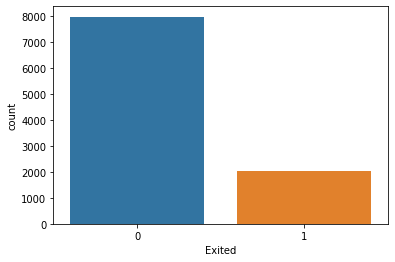

In [10]:
sns.countplot(x='Exited', data= df)
exited, not_exited = df.Exited.value_counts()
print("Exited :", exited)
print("Not Exited : ", not_exited)

In [0]:
geo_dumm = pd.get_dummies(df_copy.Geography, drop_first = True)

In [0]:
gen_dumm = pd.get_dummies(df_copy.Gender, drop_first = True)

In [0]:
df_copy.drop(['Geography','Gender'], axis=1, inplace=True)

In [0]:
df_copy = pd.concat([df_copy, gen_dumm, geo_dumm], axis=1)

In [0]:
x = df_copy.drop('Exited', axis=1)
y = df_copy['Exited']

In [16]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.2, random_state = 0)
train_x.shape
train_y.shape

(8000,)

In [0]:
ss = StandardScaler()

In [18]:
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)
train_x.shape

(8000, 11)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [0]:
classifier = Sequential()

In [0]:
classifier.add(Dense(units=8, input_dim =11 ,  activation='relu', kernel_initializer= 'uniform', use_bias=True ))

In [0]:
classifier.add(Dense(units=6, activation='relu', kernel_initializer= 'uniform', use_bias=True))
classifier.add(Dense(units=6, activation='relu', kernel_initializer= 'uniform',use_bias=True ))

In [0]:
classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer = 'uniform',use_bias=True))

In [0]:
classifier.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
classifier.fit(train_x, train_y, batch_size=100, epochs=200)

In [0]:
y_pred =classifier.predict(test_x)

In [0]:
y_pred = (y_pred > 0.5)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(test_y, y_pred)

0.8595

In [0]:
## Evaluating  model

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [0]:
def built_classifier(optimizer= 'adam', dropout_rate = 0.1):
  classifier = Sequential()
  classifier.add(Dense(units=8, input_dim =11 ,  activation='relu', kernel_initializer= 'uniform', use_bias=True ))
  classifier.add(Dropout(rate=dropout_rate))

  classifier.add(Dense(units=6, activation='relu', kernel_initializer= 'uniform', use_bias=True))
  classifier.add(Dropout(rate=dropout_rate))

  classifier.add(Dense(units=6, activation='relu', kernel_initializer= 'uniform', use_bias=True ))
  classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer = 'uniform', use_bias=True))
  classifier.compile(optimizer=optimizer, metrics=['accuracy'], loss='binary_crossentropy')
  return classifier

In [0]:
classifier = KerasClassifier(build_fn=built_classifier,batch_size=100, epochs=200, )

In [0]:
accuracy = cross_val_score(estimator=classifier, X = train_x, y = train_y, cv = 10, scoring='accuracy', n_jobs=-1, )

In [24]:
accuracy.mean()

0.8355

In [25]:
accuracy.std()

0.013028814220795389

In [0]:
parammeter = {'optimizer': ['RMSprop', 'adam'],
              'dropout_rate' : [0.05, 0.2]}

In [0]:
grid_search = GridSearchCV( estimator=classifier, param_grid=parammeter, cv = 5, scoring='accuracy', n_jobs=-1, )

In [28]:
grid_search.fit(X=train_x, y=train_y)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/200





8000/8000 [==============================] - 1s 169us/step - loss: 0.6740 - acc: 0.7900
Epoch 2/200
8000/8000 [==============================] - 0s 32us/step - loss: 0.6078 - acc: 0.7960
Epoch 3/200
8000/8000 [==============================] - 0s 32us/step - loss: 0.5030 - acc: 0.7960
Epoch 4/200
8000/8000 [==============================] - 0s 31us/step - loss: 0.4520 - acc: 0.7960
Epoch 5/200
8000/8000 [==============================] - 0s 31us/step - loss: 0.4442 - acc: 0.7960
Epoch 6/200
8000/8000 [==============================] - 0s 35us/step - loss: 0.4402 - acc: 0.7960
Epoch 7/200
8000/8000 [==============================] - 0s 31us/step - loss: 0.4368 - acc: 0.7960
Epoch 8/200
8000/8000 [==============================] - 0s 32us/step - loss: 0.434

GridSearchCV(cv=5, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f55d8f53b00>,
             iid='deprecated', n_jobs=-1,
             param_grid={'dropout_rate': [0.05, 0.2],
                         'optimizer': ['RMSprop', 'adam']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [29]:
grid_search.best_params_

{'dropout_rate': 0.05, 'optimizer': 'RMSprop'}

In [0]:
classifier = Sequential()
classifier.add(Dense(units=8, input_dim =11 ,  activation='relu', kernel_initializer= 'uniform', use_bias=True ))
classifier.add(Dropout(rate=0.05))

classifier.add(Dense(units=6, activation='relu', kernel_initializer= 'uniform', use_bias=True))
classifier.add(Dropout(rate=0.05))

classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer = 'uniform', use_bias=True))
classifier.compile(optimizer='RMSprop', metrics=['accuracy'], loss='binary_crossentropy')

In [33]:
classifier.fit(train_x, train_y, batch_size=100, epochs=1000)

Epoch 1/1000
8000/8000 [==============================] - 0s 60us/step - loss: 0.6646 - acc: 0.7897
Epoch 2/1000
8000/8000 [==============================] - 0s 35us/step - loss: 0.5672 - acc: 0.7960
Epoch 3/1000
8000/8000 [==============================] - 0s 34us/step - loss: 0.4716 - acc: 0.7960
Epoch 4/1000
8000/8000 [==============================] - 0s 32us/step - loss: 0.4450 - acc: 0.7960
Epoch 5/1000
8000/8000 [==============================] - 0s 32us/step - loss: 0.4387 - acc: 0.7960
Epoch 6/1000
8000/8000 [==============================] - 0s 31us/step - loss: 0.4355 - acc: 0.7960
Epoch 7/1000
8000/8000 [==============================] - 0s 32us/step - loss: 0.4338 - acc: 0.7960
Epoch 8/1000
8000/8000 [==============================] - 0s 31us/step - loss: 0.4323 - acc: 0.7960
Epoch 9/1000
8000/8000 [==============================] - 0s 33us/step - loss: 0.4317 - acc: 0.7960
Epoch 10/1000
8000/8000 [==============================] - 0s 36us/step - loss: 0.4319 - acc: 0.7960

In [0]:
y_prediction = classifier.predict(test_x)

In [35]:
classifier.predict_classes(test_x)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
confusion_matrix(test_y, classifier.predict_classes(test_x))

array([[1552,   43],
       [ 274,  131]])

In [40]:
accuracy_score(test_y, classifier.predict_classes(test_x))

0.8415